In [46]:
import pandas as pd
import numpy as np

In [7]:
df=pd.read_csv('AAPL.csv')

In [8]:
df.head()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0


In [10]:
df2=df.reset_index()['close']

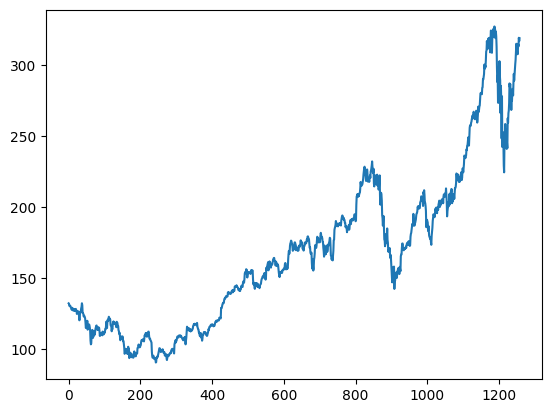

In [12]:
import matplotlib.pyplot as plt
plt.plot(df2)

In [16]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler  # Corrected the class name
scaler = MinMaxScaler(feature_range=(0, 1))

df2 = scaler.fit_transform(np.array(df2).reshape(-1, 1))

df2 = pd.DataFrame(df2, columns=['Scaled Values'])
print(df2.head())


   Scaled Values
0       0.176074
1       0.174956
2       0.168623
3       0.169699
4       0.167272


In [19]:
train_size=int(len(df2)*0.70)
test_size=len(df2)-train_size
train_data,test_data=df2[0:train_size],df2[train_size:len(df2)] # Removed the extra ,:1 which was causing the error as df2 is now a single column DataFrame

In [29]:
def database(dataset, timestep=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - timestep - 1):
        a = dataset.iloc[i:(i + timestep), 0]  # Use iloc for pandas DataFrame
        dataX.append(a.values)  # Convert to NumPy array
        dataY.append(dataset.iloc[i + timestep, 0])
    return np.array(dataX), np.array(dataY)


In [30]:
timestep=100
x_train,y_train=database(train_data,timestep)
x_test,y_test=database(test_data,timestep)

In [31]:
print(x_train)

[[0.17607447 0.17495567 0.16862282 ... 0.09055982 0.08388922 0.09085536]
 [0.17495567 0.16862282 0.1696994  ... 0.08388922 0.09085536 0.0873934 ]
 [0.16862282 0.1696994  0.16727181 ... 0.09085536 0.0873934  0.09030651]
 ...
 [0.38769737 0.39723888 0.39609896 ... 0.48184582 0.43836021 0.43016972]
 [0.39723888 0.39609896 0.40175631 ... 0.43836021 0.43016972 0.40724479]
 [0.39609896 0.40175631 0.40010977 ... 0.43016972 0.40724479 0.42670776]]


In [33]:
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM

In [38]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [37]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 50)             │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [39]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 11s 204ms/step - loss: 0.0438 - val_loss: 0.0541
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 158ms/step - loss: 0.0062 - val_loss: 0.0052
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 158ms/step - loss: 0.0014 - val_loss: 0.0089
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 157ms/step - loss: 0.0013 - val_loss: 0.0042
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 262ms/step - loss: 7.7010e-04 - val_loss: 0.0043
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 157ms/step - loss: 8.3219e-04 - val_loss: 0.0048
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 155ms/step - loss: 6.5256e-04 - val_loss: 0.0050
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 158ms/step - loss: 6.8842e-04 - val_loss: 0.0057
Epoch 9/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 155ms/step - loss: 6.2410e-04 - val_loss: 0.0056
Epoch 10/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 254ms/step - loss: 6.2592e-04 - val_loss: 0.0058
Epoch 11/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 159ms/step - loss: 6.5558e-04 - val_loss: 0.0059
Epoch 12/100

In [40]:
train_predict=model.predict(x_train)
test_predict=model.predict(x_test)

25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


In [41]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [42]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

151.26913947362246

In [44]:
math.sqrt(mean_squared_error(y_test,test_predict))

250.2678204423539

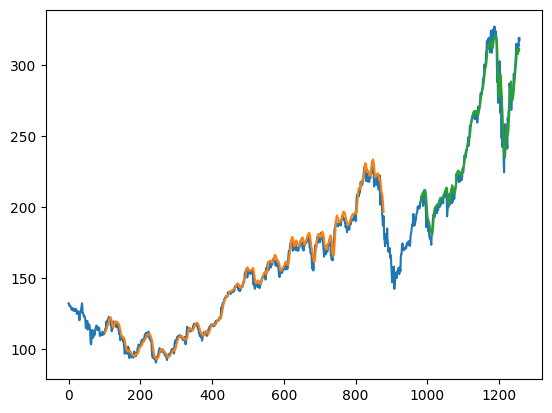

In [49]:
### Plotting
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df2)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df2)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df2)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df2))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [52]:
x_input=test_data[341:].values.reshape(1,-1)
x_input.shape

(1, 37)

In [53]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [58]:
from numpy import array
lst_output=[]
n_steps=100
i=0
while(i<30):
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


print(lst_output)

[-0.00114405]
98
[-0.00114405]
99
[-0.00114405]
100
[-0.00114405]
101
4 day input [ 0.65266402  0.63780292  0.7267162   0.71388162  0.74191506  0.75002111
  0.77222832  0.83049059  0.8194292   0.8289707   0.8125475   0.78776492
  0.75162543  0.78426074  0.77974331  0.81326522  0.8141096   0.79473106
  0.83336148  0.85898843  0.83901883  0.85628641  0.87486279  0.88782403
  0.90095415  0.92793211  0.948535    0.93333615  0.91746179  0.92544119
  0.91771511  0.9483239   0.94064004  0.96635143  0.9563033   0.96491598
 -0.00113597 -0.00113601 -0.00113604 -0.00113609 -0.00113614 -0.0011362
 -0.00113627 -0.00113634 -0.00113643 -0.00113653 -0.00113664 -0.00113676
 -0.00113691 -0.00113707 -0.00113725 -0.00113744 -0.00113767 -0.00113792
 -0.00113818 -0.00113848 -0.00113881 -0.00113917 -0.00113956 -0.00114
 -0.00114048 -0.00114101 -0.00114162 -0.00114231 -0.0011431  -0.00114405
 -0.00114405 -0.00114405 -0.00114405 -0.00114405 -0.00114405 -0.00114405
 -0.00114405 -0.00114405 -0.00114405 -0.001144

In [56]:
temp_input

[0.6356919699400492,
 0.6526640209406402,
 0.637802921557038,
 0.7267162036646122,
 0.7138816178333194,
 0.7419150553069325,
 0.7500211095161702,
 0.7722283205268936,
 0.8304905851557884,
 0.8194291986827664,
 0.8289706999915563,
 0.8125474964113824,
 0.7877649244279323,
 0.7516254327450818,
 0.7842607447437306,
 0.7797433082833742,
 0.8132652199611587,
 0.8141096006079542,
 0.7947310647639958,
 0.8333614793548934,
 0.8589884319851391,
 0.8390188296884238,
 0.8562864139153934,
 0.8748627881448958,
 0.887824031073208,
 0.9009541501308793,
 0.9279321117959978,
 0.9485349995778098,
 0.9333361479354896,
 0.9174617917757326,
 0.925441188887951,
 0.9177151059697712,
 0.9483239044161109,
 0.9406400405302711,
 0.9663514312251966,
 0.9563033015283293,
 0.964915984125644,
 -0.0011359741911292076,
 -0.0011360058560967445,
 -0.0011360440403223038,
 -0.00113608967512846,
 -0.00113613810390234,
 -0.0011362042278051376,
 -0.0011362694203853607,
 -0.0011363448575139046,
 -0.0011364305391907692,
 -0.00

In [59]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

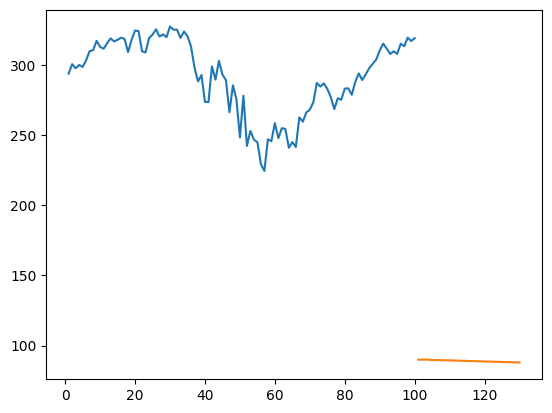

In [61]:
import matplotlib.pyplot as plt

plt.plot(day_new,scaler.inverse_transform(df2[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))